***EDA for Telecom Customer Churn***

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("customer_churn_data.csv")
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,0,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,0,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,1,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,1,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,1,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5875,CUST5875,Male,0,Yes,Yes,71,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,74.21,5268.91,No
5876,CUST5876,Male,0,No,No,22,Yes,Yes,DSL,No,...,Yes,Yes,No,Yes,One year,No,Mailed check,65.43,1439.46,Yes
5877,CUST5877,Female,0,No,No,68,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,No,One year,Yes,Bank transfer,59.78,4065.04,No
5878,CUST5878,Female,0,Yes,Yes,14,No,No phone service,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,91.88,1286.32,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5880 non-null   object 
 1   gender            5880 non-null   object 
 2   SeniorCitizen     5880 non-null   int64  
 3   Partner           5880 non-null   object 
 4   Dependents        5880 non-null   object 
 5   tenure            5880 non-null   int64  
 6   PhoneService      5880 non-null   object 
 7   MultipleLines     5880 non-null   object 
 8   InternetService   5880 non-null   object 
 9   OnlineSecurity    5880 non-null   object 
 10  OnlineBackup      5880 non-null   object 
 11  DeviceProtection  5880 non-null   object 
 12  TechSupport       5880 non-null   object 
 13  StreamingTV       5880 non-null   object 
 14  StreamingMovies   5880 non-null   object 
 15  Contract          5880 non-null   object 
 16  PaperlessBilling  5880 non-null   object 


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5880.000000,5880.000000,5880.000000,5880.000000
mean,0.500680,36.549150,70.157779,2566.813165
std,0.500042,20.909674,28.804615,1910.017743
min,0.000000,1.000000,20.000000,20.030000
25%,0.000000,18.000000,45.717500,1020.217500
50%,1.000000,37.000000,70.155000,2136.445000
75%,1.000000,55.000000,95.457500,3767.665000
max,1.000000,72.000000,119.990000,8589.600000


In [ ]:
df["customerID"].duplicated().sum()

0

Converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [ ]:
def con(value):
  if value == 1:
    return "yes"
  else:
      return "no"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(con)



In [ ]:
df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0000,Male,no,No,Yes,23,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer,49.85,1146.55,No
1,CUST0001,Female,no,Yes,No,43,No,No phone service,DSL,Yes,...,Yes,No,Yes,No,Month-to-month,No,Mailed check,100.70,4330.10,Yes
2,CUST0002,Male,yes,No,No,51,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,No,Electronic check,97.33,4963.83,Yes
3,CUST0003,Male,yes,No,No,72,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Credit card,101.38,7299.36,No
4,CUST0004,Male,yes,No,No,25,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Electronic check,52.22,1305.50,Yes
5,CUST0005,Female,no,Yes,No,35,Yes,No,DSL,No,...,No,Yes,Yes,Yes,One year,No,Credit card,116.96,4093.60,No
6,CUST0006,Male,no,Yes,No,17,No,No phone service,DSL,No,...,No,Yes,No,Yes,One year,Yes,Bank transfer,91.53,1556.01,Yes
7,CUST0007,Male,no,Yes,Yes,18,Yes,No,DSL,No,...,Yes,Yes,No,Yes,One year,No,Mailed check,26.52,477.36,Yes
8,CUST0008,Male,no,No,No,27,No,No phone service,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,67.77,1829.79,Yes
9,CUST0009,Female,no,No,No,15,No,No phone service,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,86.45,1296.75,Yes


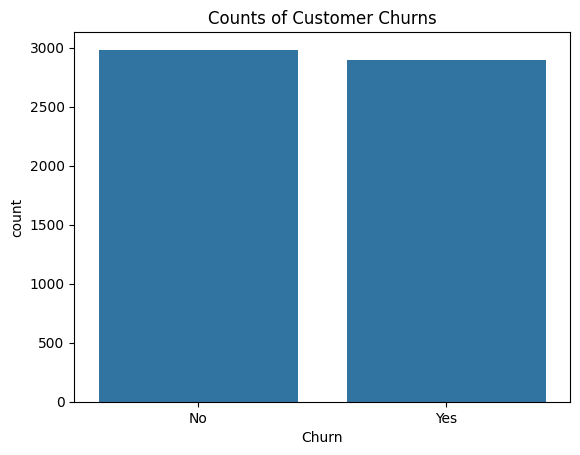

In [ ]:
sns.countplot(x ='Churn', data = df)
plt.title('Counts of Customer Churns')
plt.show()


from the given pie chart we can conclude that 49.29% of our customers have churned out

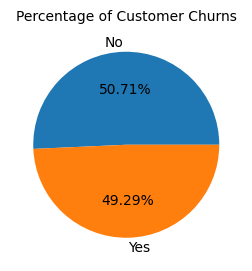

In [ ]:
plt.figure(figsize = (3,4))
gb = df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'], labels = gb.index, autopct = '%1.2f%%')
plt.title('Percentage of Customer Churns', fontsize=10)
plt.show()

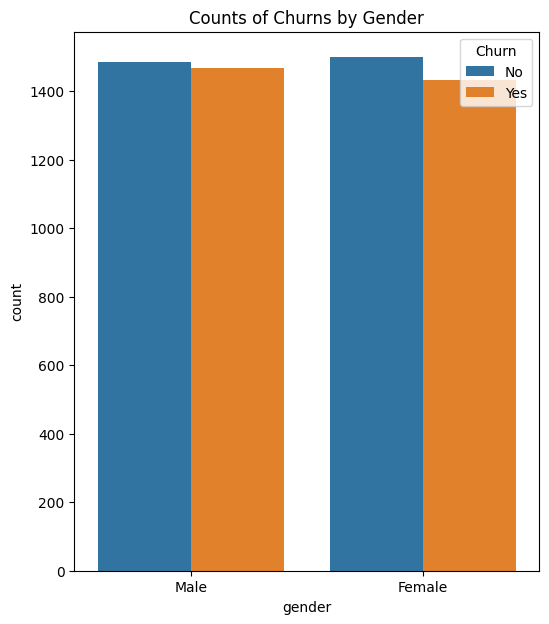

In [ ]:
plt.figure(figsize = (6,7))
sns.countplot(x = 'gender', data = df , hue = 'Churn')
plt.title('Counts of Churns by Gender')
plt.show()

comparative a greater percentage of people in senior citizen category have churned

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5880 non-null   object 
 1   gender            5880 non-null   object 
 2   SeniorCitizen     5880 non-null   int64  
 3   Partner           5880 non-null   object 
 4   Dependents        5880 non-null   object 
 5   tenure            5880 non-null   int64  
 6   PhoneService      5880 non-null   object 
 7   MultipleLines     5880 non-null   object 
 8   InternetService   5880 non-null   object 
 9   OnlineSecurity    5880 non-null   object 
 10  OnlineBackup      5880 non-null   object 
 11  DeviceProtection  5880 non-null   object 
 12  TechSupport       5880 non-null   object 
 13  StreamingTV       5880 non-null   object 
 14  StreamingMovies   5880 non-null   object 
 15  Contract          5880 non-null   object 
 16  PaperlessBilling  5880 non-null   object 


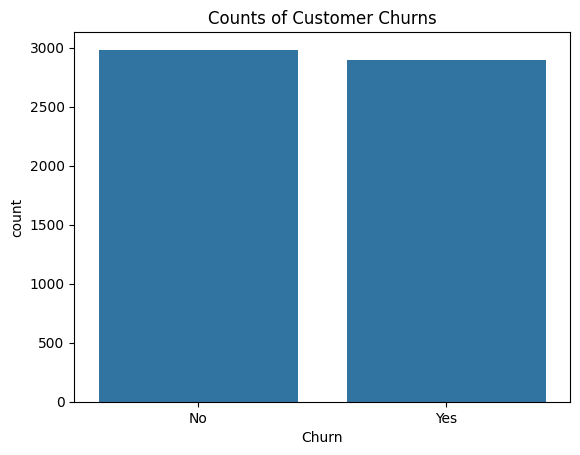

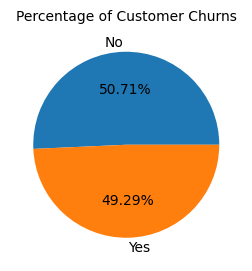

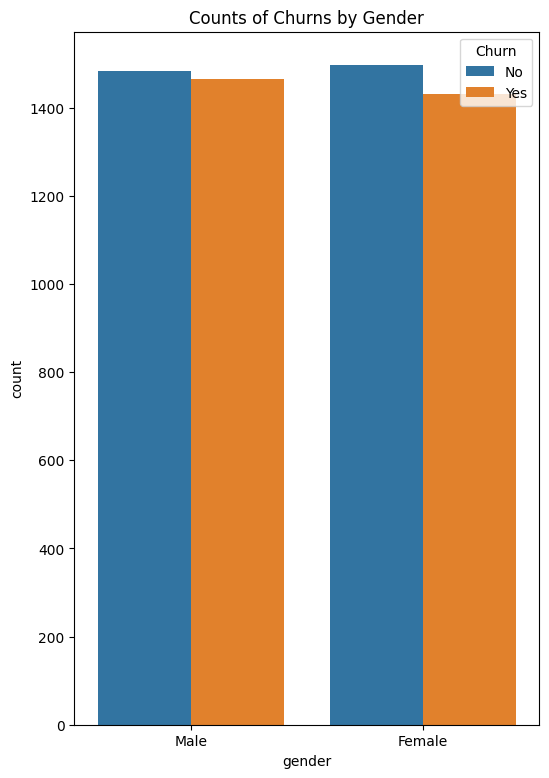

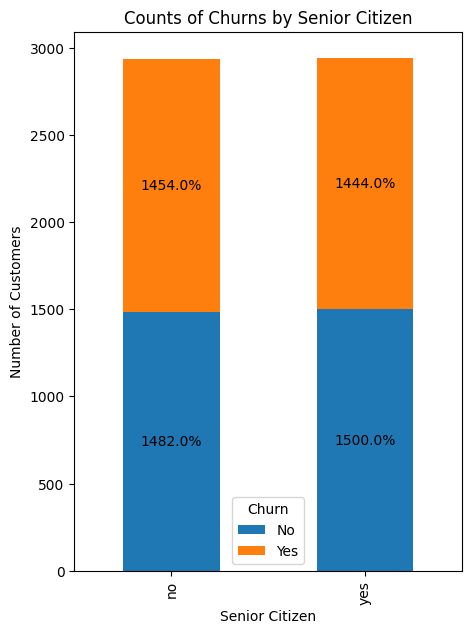

In [ ]:
# prompt: plt.figure(figsize = (6,9))
# sns.countplot(x = 'SeniorCitizen', data = df , hue = 'Churn')
# plt.title('Counts of Churns by Senior Citizen')
# plt.show()                                                                                                                                                                   i want to create stack bar chart which gives me labels as % to total

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# ***EDA for Telecom Customer Churn***


df = pd.read_csv("customer_churn_data.csv")
df

df.info()
df.isnull().sum()
df.describe()
df["customerID"].duplicated().sum()
# Converted 0 and 1 values of senior citizen to yes/no to make it easier to understand
def con(value):
  if value == 1:
    return "yes"
  else:
      return "no"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(con)


df.head(20)
sns.countplot(x ='Churn', data = df)
plt.title('Counts of Customer Churns')
plt.show()

plt.figure(figsize = (3,4))
gb = df.groupby('Churn').agg({'Churn':'count'})
plt.pie(gb['Churn'], labels = gb.index, autopct = '%1.2f%%')
plt.title('Percentage of Customer Churns', fontsize=10)
plt.show()
plt.figure(figsize = (6,9))
sns.countplot(x = 'gender', data = df , hue = 'Churn')
plt.title('Counts of Churns by Gender')
plt.show()

# Create a cross-tabulation of SeniorCitizen and Churn
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Calculate the percentage of each group
ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100

# Create the stacked bar chart
ax = ct.plot(kind='bar', stacked=True, figsize=(5, 7))

# Add percentage labels to the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Counts of Churns by Senior Citizen')
plt.xlabel('Senior Citizen')
plt.ylabel('Number of Customers')
plt.show()


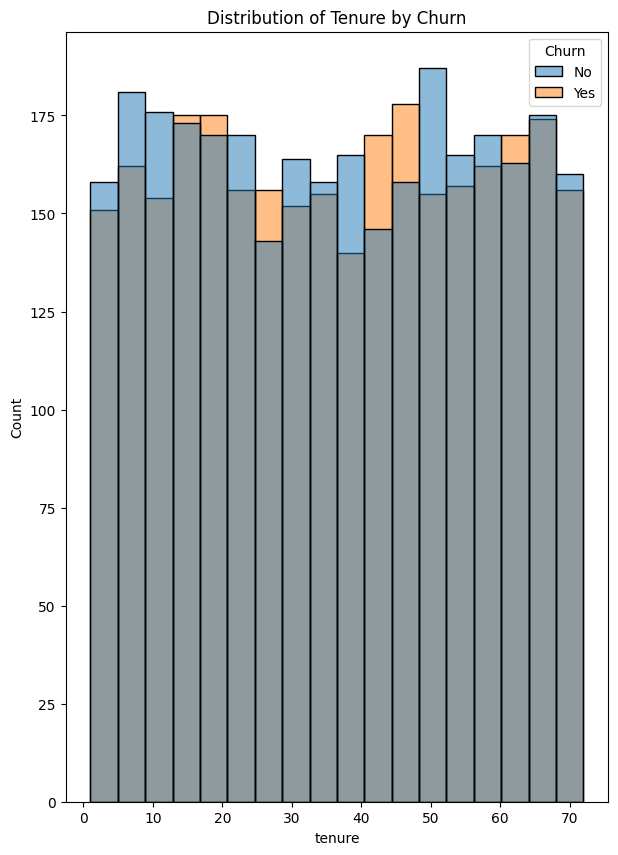

In [ ]:
plt.figure(figsize = (7,10))
sns.histplot(x = 'tenure' , data = df , hue = 'Churn')
plt.title('Distribution of Tenure by Churn')
plt.show()

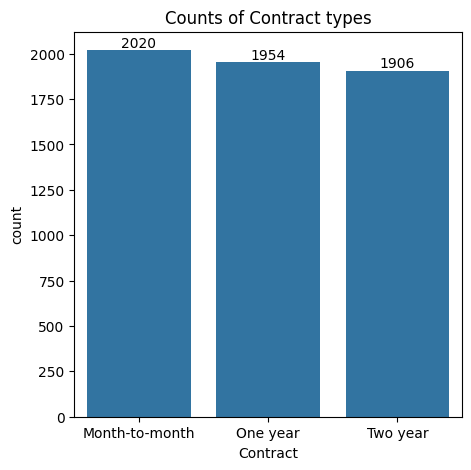

In [ ]:
plt.figure(figsize = (5,5))
ax = sns.countplot(x = "Contract" , data = df)
ax.bar_label(ax.containers[0])
plt.title('Counts of Contract types')
plt.show()


In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

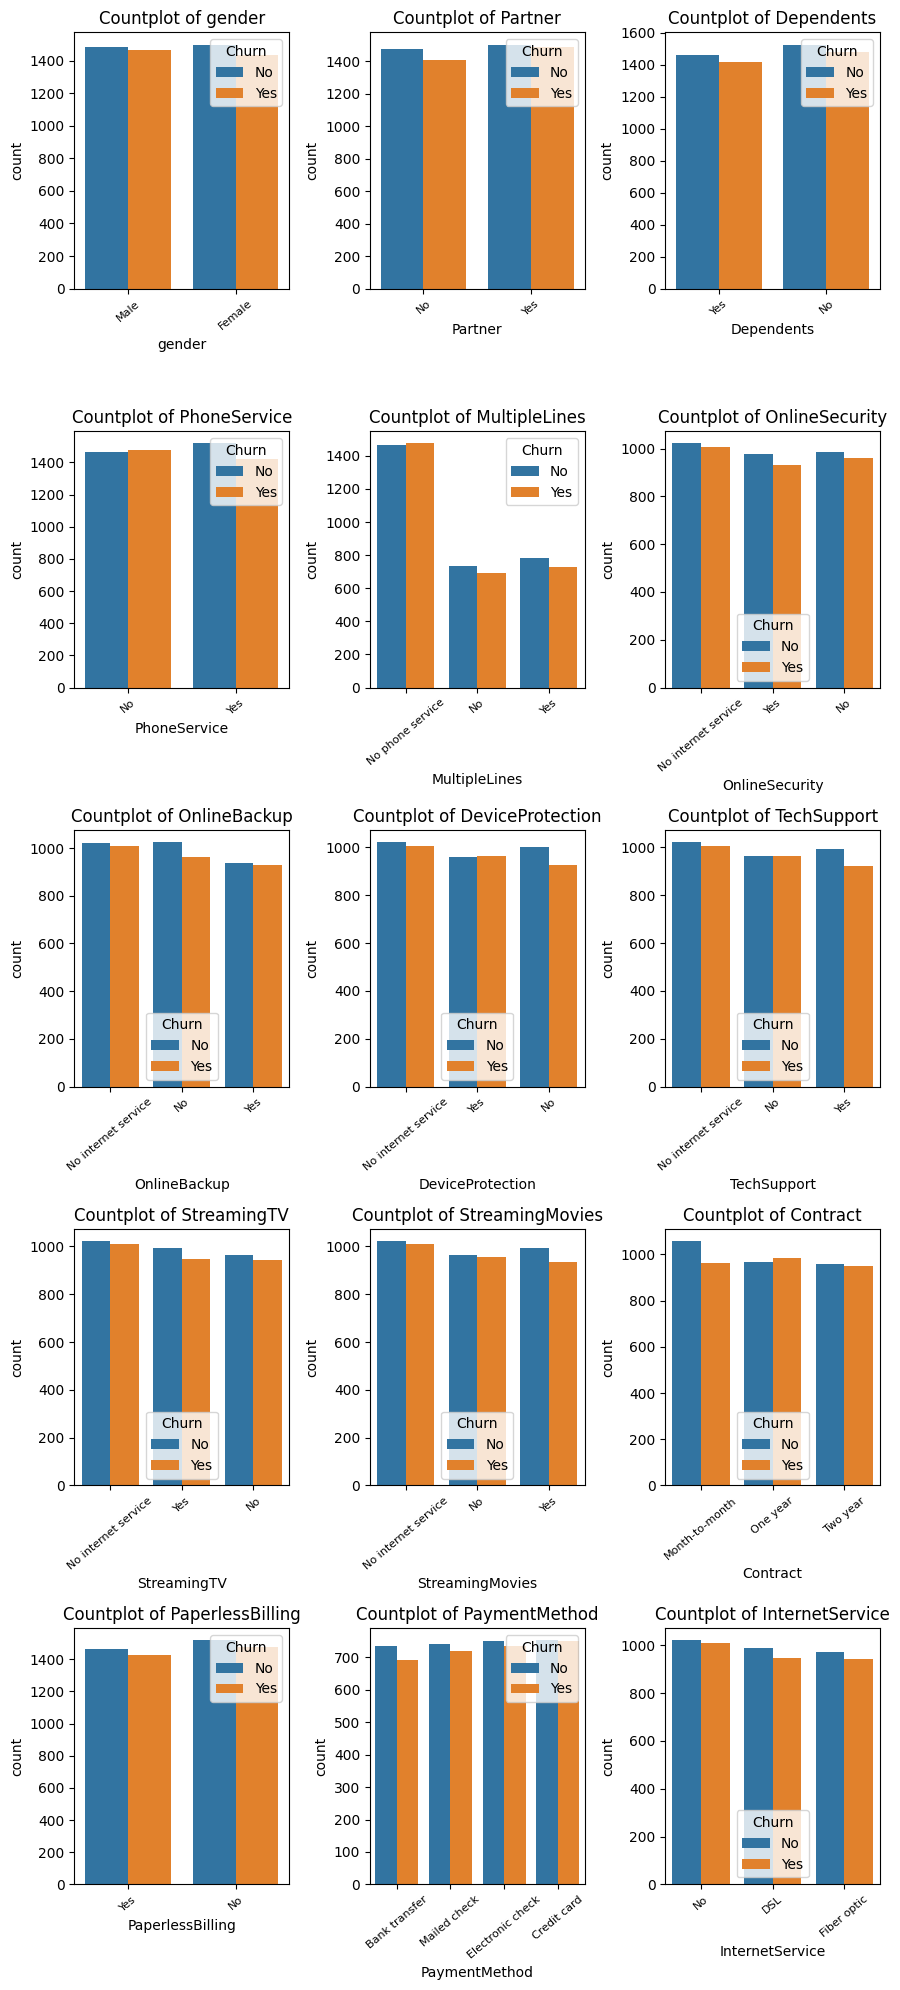

In [ ]:
# prompt: these are the columns and i want to create subplots from this data where each plot would be a countplot



# Assuming df is already defined and contains the data

# List of columns for which you want to create countplots
columns_to_plot = ['gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'InternetService']

# Create subplots
num_cols = 3  # Number of columns in the subplot grid
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(9, num_rows * 4))  # Adjust figsize as needed
axs = axs.flatten()

for i, col in enumerate(columns_to_plot):
  sns.countplot(x=col, data=df, ax=axs[i] , hue= df["Churn"])
  axs[i].set_title(f'Countplot of {col}')
  axs[i].tick_params(axis='x', rotation=40, labelsize=8)  # Rotate x-axis labels if needed

# Remove any unused subplots
for i in range(len(columns_to_plot), len(axs)):
  fig.delaxes(axs[i])

plt.tight_layout()
plt.show()


***The analysis reveals a higher churn rate among senior citizens and customers with shorter tenures. Moreover, month-to-month contracts exhibit a significantly greater churn rate compared to other contract types. Furthermore, various services such as online security, tech support, and streaming services display a notable influence on customer churn.***

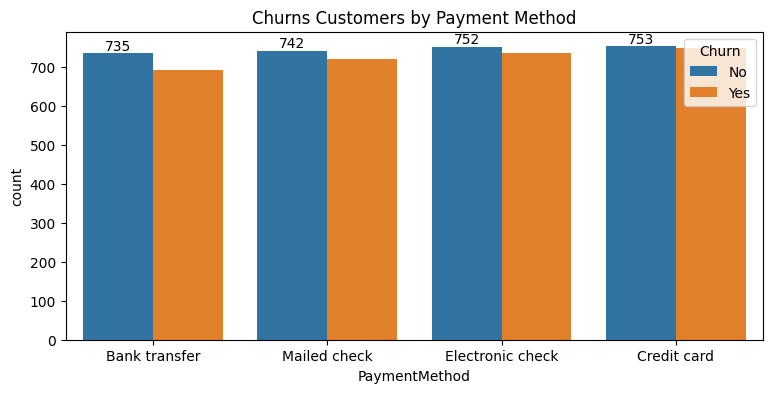

In [ ]:
plt.figure(figsize = (9,4))
ax = sns.countplot(x = "PaymentMethod" , data = df , hue='Churn')
ax.bar_label(ax.containers[0])
plt.title('Churns Customers by Payment Method')
plt.show()

***The graph shows the number of churned customers by payment method.***

 Electronic check method has the highest churn rate.
 Mailed check, bank transfer (automatic), and credit card (automatic) methods have a lower churn rate.

***Summary***
This EDA analyzes customer churn data from a telecom company to identify factors influencing churn.

**Key Findings:**

* **Churn Rate:** A significant portion of customers are churning, with clear visual representations of the churn rate.
* **Senior Citizens:** Senior citizens show a higher churn rate compared to other customer segments.
* **Tenure:** Customers with shorter tenures are more likely to churn.
* **Contract Type:** Month-to-month contracts have a substantially higher churn rate than one-year or two-year contracts.
* **Services:** Certain services like online security, tech support, and streaming services influence churn.
* **Payment Method:** Customers using electronic checks have a significantly higher churn rate, while other methods like mailed check, bank transfer, and credit card have lower churn rates.
* **Gender:**  Slight difference in churn rates based on gender.

**Overall:**

The analysis highlights that senior citizens, customers with shorter tenures, and those with month-to-month contracts are more prone to churn.  Additionally, access to certain services and the chosen payment method appear to play a significant role in customer retention.
